# Instructions:

This is your special assessment for CSE330 Lab. ***Please read the instructions carefully!***

1. You must rename this file as "ID_Name_Section_SA.ipynb". Example: "21212121_Niloy Farhan_01-SA.ipynb".
2. There are 4 tasks and each task have several substasks. This tasks are based on the content of lab 5 and lab 6.
3. You must use designated cells for each task. You should not use additional cells for codes of a task.
4. Some task may have no output. It will be mentioned in the designated cells.
5. Not a single line of code of this assessment should be written by AI. If you do, karma will hit you back. ;)
6. **Plagarism can lead to a zero mark in Final Assessment.**
7. If you have any queries, reach out to your lab faculties.


**Best of luck!**

# Task1.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

f. Compare the error of each method with actual differentiation at $x = 0 , -1.18625$ by showing in a Pandas Dataframe.

g. plot error vs h curves with proper label and color for each method at $x = 0$ and $h = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]$.


In [ ]:
# Import cells. This is done for you!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

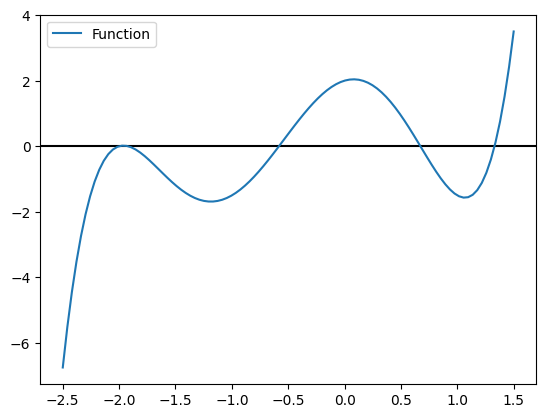

In [ ]:
#1.a This cell should plot a graph. You must use polynomial class.

f = Polynomial([2, 1, -6, -2, 2.5, 1])

fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
data = f.linspace(domain=[-2.5, 1.5])
ax.plot(data[0], data[1], label='Function')

ax.legend()

Slope at x = 0 : 1.0
Slope at x = -1.18625 : -9.340808105218201e-06
f′(x) = 1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴


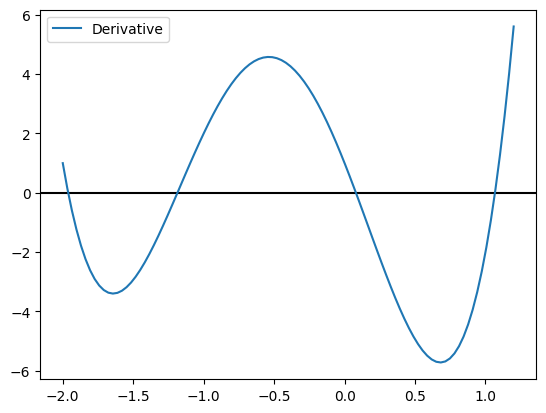

In [ ]:
#1.b This cell should print and plot a graph.

f = Polynomial([2, 1, -6, -2, 2.5, 1])
f_prime = f.deriv(1)

x = [0, -1.18625]
for i in x:
    actual_slope = f_prime(i)
    print("Slope at x =",i,":",actual_slope)

print("f′(x) =",f_prime)

fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

data = f_prime.linspace(domain=[-2, 1.2])
ax.plot(data[0], data[1], label='Derivative')

ax.legend()

In [ ]:
#1.c This cell should print

def forward_diff(f, h, x):
    return (f(x+h) - f(x)) / h

print("Slope at x = 0:",forward_diff(f, 0.1, 0))
print("Slope at x = -1.18625:",forward_diff(f, 0.1, -1.18625))

Slope at x = 0: 0.3826000000000018
Slope at x = -1.18625: 0.5520088838012782


In [ ]:
#1.d This cell should print

def backward_diff(f, h, x):
    return (f(x) - f(x-h)) / h

print("Slope at x = 0:",backward_diff(f, 0.1, 0))
print("Slope at x = -1.18625:",backward_diff(f, 0.1, -1.18625))

Slope at x = 0: 1.5776000000000012
Slope at x = -1.18625: -0.5476397529174859


In [ ]:
#1.e This cell should print

def central_diff(f, h, x):
    return (f(x+h) - f(x-h)) / (2*h)

print("Slope at x = 0:",central_diff(f, 0.1, 0))
print("Slope at x = -1.18625:",central_diff(f, 0.1, -1.18625))

Slope at x = 0: 0.9801000000000015
Slope at x = -1.18625: 0.002184565441896158


In [ ]:
#1.f This cell should show a table

def compare(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [], "FD Error" : [], "BD Error": [], "CD Error" : []}     #
    #Write code here
    for i in x:
        Y_correct = f_prime(i)
        f_slope = forward_diff(f, h, i)
        b_slope = backward_diff(f, h, i)
        c_slope = central_diff(f, h, i)

        f_error = (Y_correct - f_slope)
        b_error = (Y_correct - b_slope)
        c_error = (Y_correct - c_slope)

        Result['x'].append(i)
        Result['Actual'].append(Y_correct)
        Result['FD'].append(f_slope)
        Result['BD'].append(b_slope)
        Result['CD'].append(c_slope)
        Result['FD Error'].append(f_error)
        Result['BD Error'].append(b_error)
        Result['CD Error'].append(c_error)

    df = pd.DataFrame(Result)
    print(df)

compare(f, f_prime, 0.1, [0, -1.18625])

         x    Actual        FD       BD        CD  FD Error  BD Error  \
0  0.00000  1.000000  0.382600  1.57760  0.980100  0.617400  -0.57760   
1 -1.18625 -0.000009  0.552009 -0.54764  0.002185 -0.552018   0.54763   

   CD Error  
0  0.019900  
1 -0.002194  


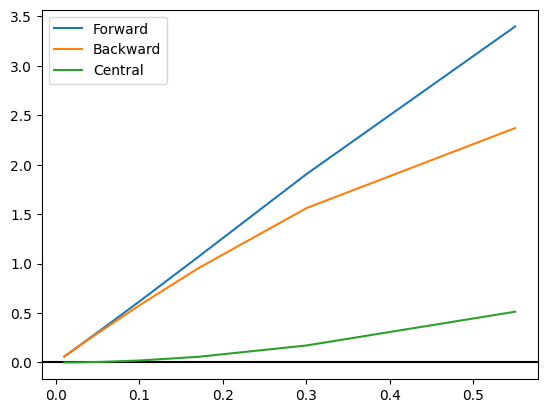

In [ ]:
#1g This cell should plot a graph.

f = Polynomial([2, 1, -6, -2, 2.5, 1])
df = f.deriv(1)
x = 0

h = np.array([0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])

actual_slope = df(x)

f_error = []
b_error = []
c_error = []

for i in h:
    forward_slope = (f(x + i) - f(x)) / i
    f_error.append(abs(forward_slope - actual_slope))

    backward_slope = (f(x) - f(x - i)) / i
    b_error.append(abs(backward_slope - actual_slope))

    central_slope = (f(x + i) - f(x - i)) / (2 * i)
    c_error.append(abs(central_slope - actual_slope))

fig, bx = plt.subplots()
bx.axhline(y=0, color='k')
bx.plot(h, f_error, label='Forward')
bx.plot(h, b_error, label='Backward')
bx.plot(h, c_error, label='Central')
bx.legend()

# Task 2.

a. Propose a better technique for numerical differentiation that provides higher accuracy than the methods you have worked so far. You need to write a function for your proposed technique.

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and step size = 0.1?

c. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−1.18625$  by showing in Pandas Dataframe.

d. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative from your proposed method in a graph. Here, $$h = 0.1, -2 \le x \le 1.2$$

In [ ]:
#2a. This cell should not have any output.
Proposed_Method_Name = "Richardson extrapolation"

#Write Code here
def dh(f, h, x):
    return (f(x+h) - f(x-h)) / (2*h)
def dh1(f, h, x):
    return (4*dh(f, h/2, x) - dh(f, h, x)) / 3

In [ ]:
#2b. This cell should print

dh1(f, 0.1, 0)
dh1(f, 0.1, -1.18625)
print("Slope at x = 0:",dh1(f, 0.1, 0))
print("Slope at x = -1.18625:",dh1(f, 0.1, -1.18625))

Slope at x = 0: 0.9999750000000011
Slope at x = -1.18625: -3.4340808106048115e-05


In [ ]:
#2c.This cell should print

def compare1(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [],"RE": [], "FD Error" : [], "BD Error": [], "CD Error" : [], "RE Error" : []}
    #Write code here
    for i in x:
        Y_correct = f_prime(i)
        f_slope = forward_diff(f, h, i)
        b_slope = backward_diff(f, h, i)
        c_slope = central_diff(f, h, i)
        r_slope = dh1(f, h, i)

        f_error = (Y_correct - f_slope)
        b_error = (Y_correct - b_slope)
        c_error = (Y_correct - c_slope)
        r_error = (Y_correct - r_slope)

        Result['x'].append(i)
        Result['Actual'].append(Y_correct)
        Result['FD'].append(f_slope)
        Result['BD'].append(b_slope)
        Result['CD'].append(c_slope)
        Result['RE'].append(r_slope)
        Result['FD Error'].append(f_error)
        Result['BD Error'].append(b_error)
        Result['CD Error'].append(c_error)
        Result['RE Error'].append(r_error)

    df = pd.DataFrame(Result)
    print(df)

compare1(f, f_prime, 0.1, [0, -1.18625])

         x    Actual        FD       BD        CD        RE  FD Error  \
0  0.00000  1.000000  0.382600  1.57760  0.980100  0.999975  0.617400   
1 -1.18625 -0.000009  0.552009 -0.54764  0.002185 -0.000034 -0.552018   

   BD Error  CD Error  RE Error  
0  -0.57760  0.019900  0.000025  
1   0.54763 -0.002194  0.000025  


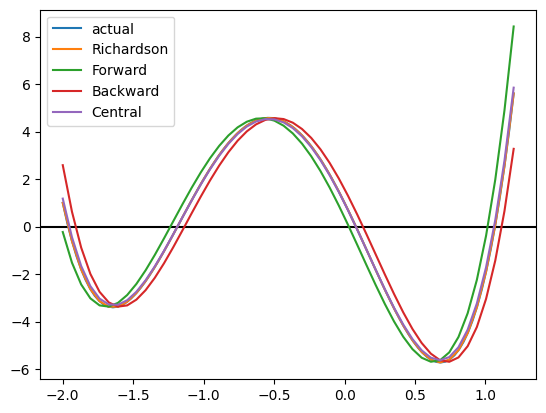

In [ ]:
#2.d This cell should plot a graph.

def draw_graph(f, ax, domain=[-10, 10], label=None):
    data = f.linspace(domain=domain)
    ax.plot(data[0], data[1], label=label)

h = 0.1

fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

draw_graph(f_prime, ax, [-2, 1.2], 'actual')

x = np.linspace(-2, 1.2, 50, endpoint=True)
y = dh1(f, h, x)
ax.plot(x, y, label='Richardson')

x = np.linspace(-2, 1.2, 50, endpoint=True)
y = forward_diff(f, h, x)
ax.plot(x, y, label='Forward')

x = np.linspace(-2, 1.2, 50, endpoint=True)
y = backward_diff(f, h, x)
ax.plot(x, y, label='Backward')

x = np.linspace(-2, 1.2, 50, endpoint=True)
y = central_diff(f, h, x)
ax.plot(x, y, label='Central')

ax.legend()

# Task 3.

Given,
$f(x) = \frac{-1}{13}x^3 + 2x^2 - 9.5x - 10\tag{3.1}$

a. (i) Write a python function that takes an input function and a list of intervals as a list and returns a dictionary that contains either root exists or not in each intervals.
Determine if root exists in $[(-20,-10),(-10,0), (0,10), (10,20), (20,30)]$.

(ii) Verify your method by ploting the function and the intervals.

In [ ]:
#3a_i This cell should print
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]  #  This snippet will be given in the question

f = Polynomial([-10, -9.5, 2, -1/13])

def root_exists(func, a, b):
  return func(a) * func(b) <= 0

root = {}

for i in intervals:
    a, b = i
    root[i] = root_exists(f, a, b)

print(f"root_existence = {root}")

root_existence = {(-20, -10): False, (-10, 0): True, (0, 10): True, (10, 20): True, (20, 30): False}


[-0.88293666  7.65898265 19.22395401]


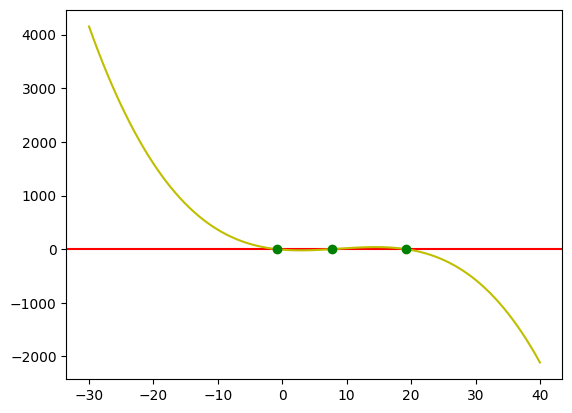

In [ ]:
#3a_ii This cell should plot a graph.

f = Polynomial([-10, -9.5, 2, -1/13])
x = np.linspace(-30, 40, 100)
y = f(x)
dictionary = {
    'x': x,
    'y': y
}
plt.axhline(y=0, color='r')
plt.plot(x, y,'y')
plt.plot(f.roots(), [0.0]*3, 'go')
print(f.roots())

b. Using Bisection method, find roots of the function $3.1$ in these intervals $[(−20,−10),(−10,0),(0,10),(10,20),(20,30)]$ where root exists. The value of machine epsilon is, $\epsilon < 10^{-6}$


You can reuse the function of Task 3.a to find out the intervals that contains root.
Note: You should return 3 different roots for the function (3.1).

In [ ]:
#3b This cell should print

f = Polynomial([-10, -9.5, 2, -1/13])

def root_exists(func, a, b):
  return func(a) * func(b) <= 0

root_existence = {}

for i in intervals:
    a, b = i
    root_existence[i] = root_exists(f, a, b)

for i, exists in root_existence.items():
    if exists:
        a, b = i
        e = 1e-6

        list_a = [a]
        list_b = [b]
        list_m = [(a + b) / 2]
        list_f = [f(list_m[0])]

        x = 0
        y = 0
        val = 2e1
        while(val >= e):
            if(f(list_a[x]) * f(list_m[x]) < 0):
                list_a.append(list_a[x])
                list_b.append(list_m[x])
            elif(f(list_b[x]) * f(list_m[x]) < 0):
                list_a.append(list_m[x])
                list_b.append(list_b[x])
            m = (list_a[x + 1] + list_b[x + 1]) / 2
            root = m
            list_f.append(f(m))
            list_m.append(m)

            if x > 1:
                val = (abs(list_m[y + 1] - list_m[y]) / abs(list_m[y]))
            print(val)
            x = x + 1
            y = y + 1

        print("Root in interval", i, ":", root)

20.0
20.0
0.5
0.5
0.16666666666666666
0.1
0.045454545454545456
0.021739130434782608
0.011111111111111112
0.005494505494505495
0.0027624309392265192
0.0013850415512465374
0.0006915629322268327
0.0003455425017277125
0.00017283097131005876
8.640055296353897e-05
4.320400933206602e-05
2.1602937999567942e-05
1.080123566135966e-05
5.400559497963989e-06
2.700294332082197e-06
1.3501435202562032e-06
6.750726715730948e-07
Root in interval (-10, 0) : -0.8829361200332642
20.0
20.0
0.07142857142857142
0.038461538461538464
0.02
0.01020408163265306
0.005050505050505051
0.0025380710659898475
0.001272264631043257
0.0006369426751592356
0.00031867431485022306
0.0001593879502709595
7.968127490039841e-05
3.984381225595665e-05
1.9922699924293742e-05
9.961548423086885e-06
4.980724595814199e-06
2.4903498941601295e-06
1.2451718461664895e-06
6.225851478577467e-07
Root in interval (0, 10) : 7.658982276916504
20.0
20.0
0.03333333333333333
0.016129032258064516
0.00819672131147541
0.0040650406504065045
0.00202429149

c. Plot the f(x) along with the roots to check if your method is working correctly.

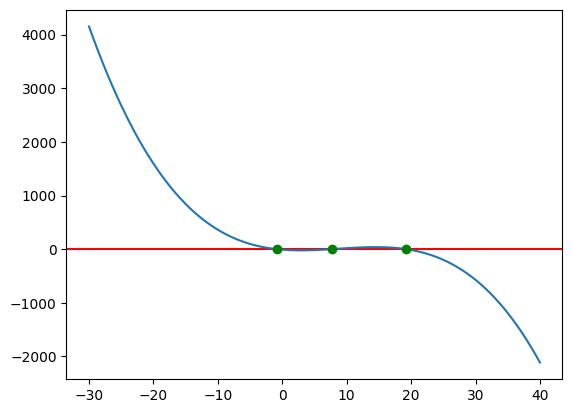

In [ ]:
#3c This cell plot a graph.

xs = np.linspace(-30, 40, 100)
ys = f(xs)

plt.axhline(y=0, color='r')
plt.plot(xs, ys)

for root in roots:
    plt.plot(root, f(root), 'go')

Task4.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{4.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq$(4.1)$, \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= \frac{1}{2}(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{4.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found along with $f(x)$.

In [ ]:
#4a This cell should print

f = Polynomial([2, 0.5, -6, -2, 2.5, 1])
roots = f.roots()
print("roots:", roots)

roots: [-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


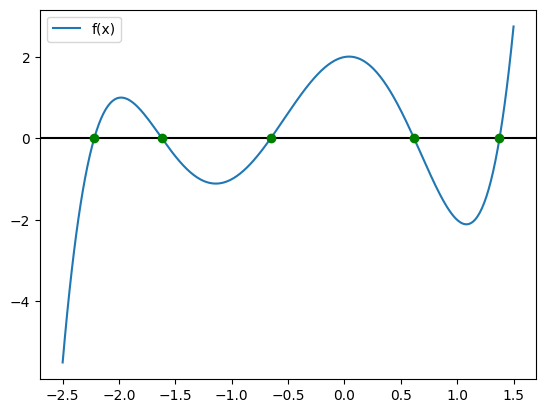

In [ ]:
#4b This cell should print plot a graph

f = Polynomial([2, 0.5, -6, -2, 2.5, 1])
x = np.linspace(-2.5, 1.5, 400)

y = f(x)
root = f.roots()

plt.plot(x, y, label='f(x)')
plt.axhline(y=0, color='k')
plt.plot(root, f(root), 'go')
plt.legend()

In [ ]:
#4c This cell should print

g1 = Polynomial([-1, 3, 1, -1.25, -0.5])
g1_prime = g1.deriv(1)
f = Polynomial([2, 0.5, -6, -2, 2.5, 1])
roots = f.roots()

λ = [abs(g1_prime(root)) for root in roots]

print(λ)

[1.9636089185405616, 1.5815594803123165, 0.6432146645597583, 2.331559480312313, 6.544323583100313]


In [ ]:
#4d This cell should print

dictionary = pd.DataFrame({
    'Root': roots,
    'λ' : λ,
    'Con/Div': ['Divergent' if lambda_val >= 1 else 'Convergent' for lambda_val in λ]
})

print(dictionary)
print("\ng1(x) is divergent.")

       Root         λ     Con/Div
0 -2.220276  1.963609   Divergent
1 -1.618034  1.581559   Divergent
2 -0.654992  0.643215  Convergent
3  0.618034  2.331559   Divergent
4  1.375268  6.544324   Divergent

g1(x) is divergent.


In [ ]:
#4e This cell have no outputs

#g4(x) =(-2.5*x**4 + 2*x**3 + 6*x**2 - 0.5*x - 2)**1/5
#g5(x) = (0.5*(x**5 + 2.5*x**4 -6*x**2 + 0.5*x +2))**1/3

def g2(x):
    p = Polynomial([2, 0.5, -2, 2.5, 1])
    return np.sqrt(p(x)/6)

def g3(x):
    p = Polynomial([-2, -0.5, 6, 2, -1])
    return np.power(p(x)/2.5, 1.0/4.0)

def g4(x):
    p = Polynomial([-2, -0.5, 6, 2, -2.5])
    return np.power(p(x)/1, 1.0/5.0)

def g5(x):
    p = Polynomial([2, 0.5, -6, 2.5, 1])
    return np.power(p(x)/1.0, 1.0/3.0)

In [ ]:
#4f This cell should print

a2 = 0.8
g2_a = []

a3 = 0.8
g3_a = []

a4 = 0.8
g4_a = []

a5 = 0.8
g5_a = []


for i in range(20):
    x2 = g2(a2)
    g2_a.append(x2)
    a2 = x2

    x3 = g3(a3)
    g3_a.append(x3)
    a3 = x3

    x4 = g4(a4)
    g4_a.append(x4)
    a4 = x4

    x5 = g5(a5)
    g5_a.append(x5)
    a5 = x5

dictionary = pd.DataFrame({
    'g2(x)': g2_a,
    'g3(x)': g3_a,
    'g4(x)': g4_a,
    'g5(x)': g5_a
})

print(dictionary)

       g2(x)     g3(x)     g4(x)     g5(x)
0   0.684300  0.952108  1.075654  0.629624
1   0.635869  1.115246  1.288144  0.895203
2   0.621223  1.251470  1.362956  0.421731
3   0.617395  1.347338  1.374225  1.108712
4   0.616439  1.407611  1.375189  0.459673
5   0.616203  1.442906  1.375262  1.077076
6   0.616145  1.462714  1.375267  0.362329
7   0.616130  1.473562  1.375268  1.152201
8   0.616127  1.479424  1.375268  0.582055
9   0.616126  1.482568  1.375268  0.953197
10  0.616126  1.484247  1.375268  0.250755
11  0.616126  1.485143  1.375268  1.214518
12  0.616126  1.485619  1.375268  0.743752
13  0.616126  1.485873  1.375268  0.728998
14  0.616126  1.486008  1.375268  0.752932
15  0.616126  1.486080  1.375268  0.713687
16  0.616126  1.486118  1.375268  0.776933
17  0.616126  1.486138  1.375268  0.672042
18  0.616126  1.486149  1.375268  0.838228
19  0.616126  1.486155  1.375268  0.553361


<ipython-input-205-8f8c9228a763>:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(p(x)/6)


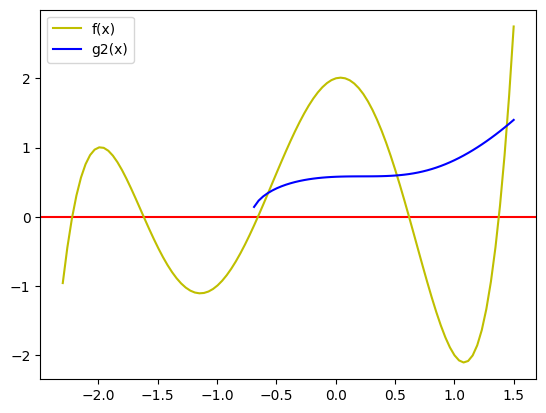

In [ ]:
#4g This cell should plot a graph. Do not plot those g(x) which will not converge.

xs = np.linspace(-2.3, 1.5, 100)
ys = f(xs)

plt.axhline(y=0, color='r')
plt.plot(xs, f(xs), label='f(x)', color='y')
plt.plot(xs, g2(xs), label='g2(x)', color='b')

plt.legend()